In [54]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
all_data = pd.read_csv('Countries.csv')

In [7]:
all_data.head()

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),...,Population,Land,Continent Name,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
0,Afghanistan,AFG,2000,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,...,19542982.0,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,724.145910,29.934415
1,Afghanistan,AFG,2001,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,...,19688632.0,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,718.788917,30.157510
2,Afghanistan,AFG,2002,38.627892,40.717968,13.670101,NaN,3.854235e+09,9.443391,NaN,...,21000256.0,652860.0,Asia,NaN,NaN,5.268779e+08,3.639705e+08,NaN,183.532775,32.166553
3,Afghanistan,AFG,2003,37.418855,40.717968,13.670101,NaN,4.539497e+09,8.941258,NaN,...,22645130.0,652860.0,Asia,NaN,NaN,6.205538e+08,4.058881e+08,NaN,200.462376,34.686043
4,Afghanistan,AFG,2004,29.721067,40.717968,13.670101,NaN,5.220825e+09,9.808474,NaN,...,23553551.0,652860.0,Asia,NaN,NaN,7.136921e+08,5.120832e+08,NaN,221.657662,36.077491


In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country Name                   5106 non-null   object 
 1   Country Code                   5106 non-null   object 
 2   Year                           5106 non-null   int64  
 3   Agriculture (% GDP)            4830 non-null   float64
 4   Ease of Doing Business         4508 non-null   float64
 5   Education Expenditure (% GDP)  4738 non-null   float64
 6   Export (% GDP)                 4646 non-null   float64
 7   GDP                            5037 non-null   float64
 8   Health Expenditure (% GDP)     4531 non-null   float64
 9   Import (% GDP)                 4646 non-null   float64
 10  Industry (% GDP)               4853 non-null   float64
 11  Inflation Rate                 4554 non-null   float64
 12  R&D                            3588 non-null   f

In [11]:
all_data.describe()

,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),Industry (% GDP),Inflation Rate,...,Unemployment,Population,Land,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
count,5106.000000,4830.000000,4508.000000,4738.000000,4646.000000,5.037000e+03,4531.000000,4646.000000,4853.000000,4554.000000,...,4439.000000,5.106000e+03,5.106000e+03,4.646000e+03,4.646000e+03,4.692000e+03,4.531000e+03,4.646000e+03,5037.000000,5106.000000
mean,2011.000000,10.893914,61.738665,14.458547,44.018003,3.120245e+11,6.167133,49.445204,26.315490,6.991400,...,8.115195,3.282803e+07,7.003599e+05,9.505712e+10,9.248778e+10,4.304518e+10,3.214250e+10,2.569338e+09,15336.273219,336.020957
std,6.633899,10.971965,13.775267,4.984259,33.173984,1.405946e+12,2.744570,30.474001,12.924200,19.858123,...,5.888784,1.281141e+08,2.117451e+06,2.638186e+11,2.720004e+11,1.946240e+11,2.012357e+11,5.380235e+10,23831.258493,1570.547928
min,2000.000000,0.012519,19.977700,0.833360,1.571162,1.396473e+07,1.263576,1.127672,2.758632,-16.859691,...,0.095000,9.609000e+03,2.027000e+00,7.959988e+06,2.290063e+07,4.129775e+06,2.093155e+06,-9.540869e+11,110.460875,0.136492
25%,2005.000000,2.275972,52.919894,10.870940,23.544736,4.186073e+09,4.158750,29.401814,17.919508,1.599237,...,3.866000,8.049668e+05,1.130000e+04,1.827572e+09,2.510900e+09,6.457364e+08,2.687793e+08,-2.043559e+09,1564.015195,30.837607
50%,2011.000000,6.979923,61.982110,13.952830,36.438987,1.777477e+10,5.639608,42.543697,24.119251,3.466447,...,6.510000,5.897816e+06,9.895395e+04,8.541387e+09,9.727140e+09,3.064088e+09,1.286994e+09,-2.340244e+08,5396.214227,82.396143
75%,2017.000000,16.748657,72.535918,17.609406,54.543771,1.216041e+11,7.865923,60.600202,31.812769,7.288914,...,10.840000,2.123560e+07,4.881000e+05,6.026577e+10,5.282874e+10,1.958102e+10,7.609297e+09,1.859483e+09,19733.229269,195.721744
max,2022.000000,79.042362,87.166330,44.801800,433.836004,2.546270e+13,24.230680,429.359095,86.669555,557.201817,...,37.320000,1.417173e+09,1.709825e+07,3.714245e+12,3.874205e+12,3.667693e+12,3.966028e+12,5.766511e+11,234317.084818,23814.890701


In [21]:
# Dividinf predictors and target columns for regression.

predictors = ['Education Expenditure (% GDP)', 'Health Expenditure (% GDP)', 
              'Unemployment', 'Population Density', 'Inflation Rate']

target = 'GDP Per Capita'

In [25]:
# Subsetting data to incluede only relevant columns.

regression_data = all_data[predictors + [target]]

In [38]:
# Imputing missing data with median.

imputer = SimpleImputer(strategy='median')

x = regression_data[predictors]
y = regression_data[target]

x_imputed = pd.DataFrame(imputer.fit_transform(x), columns = predictors)
y_imputed = y.fillna(y.median())

In [42]:
# Splitting the data into training and test sets.

x_train, x_test, y_train, y_test = train_test_split(x_imputed, y_imputed, test_size = 0.2, random_state = 42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4084, 5), (1022, 5), (4084,), (1022,))

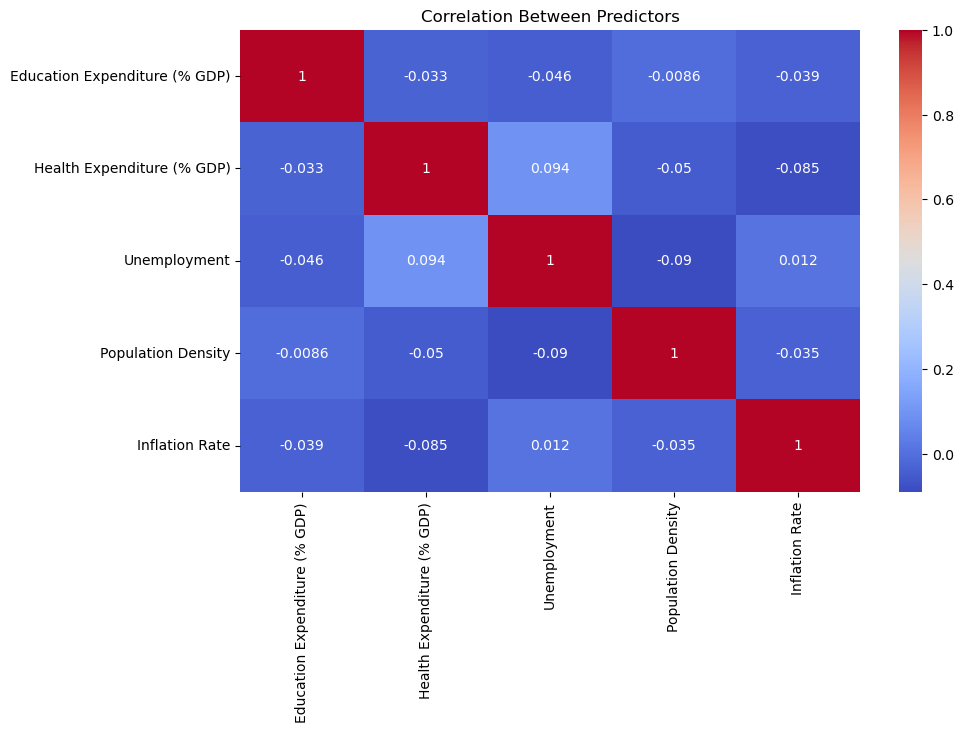

In [46]:
# Creating correlation heat map to check correlation between predictors.

plt.figure(figsize = (10,6))
sns.heatmap(x_train.corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Between Predictors")
plt.show()

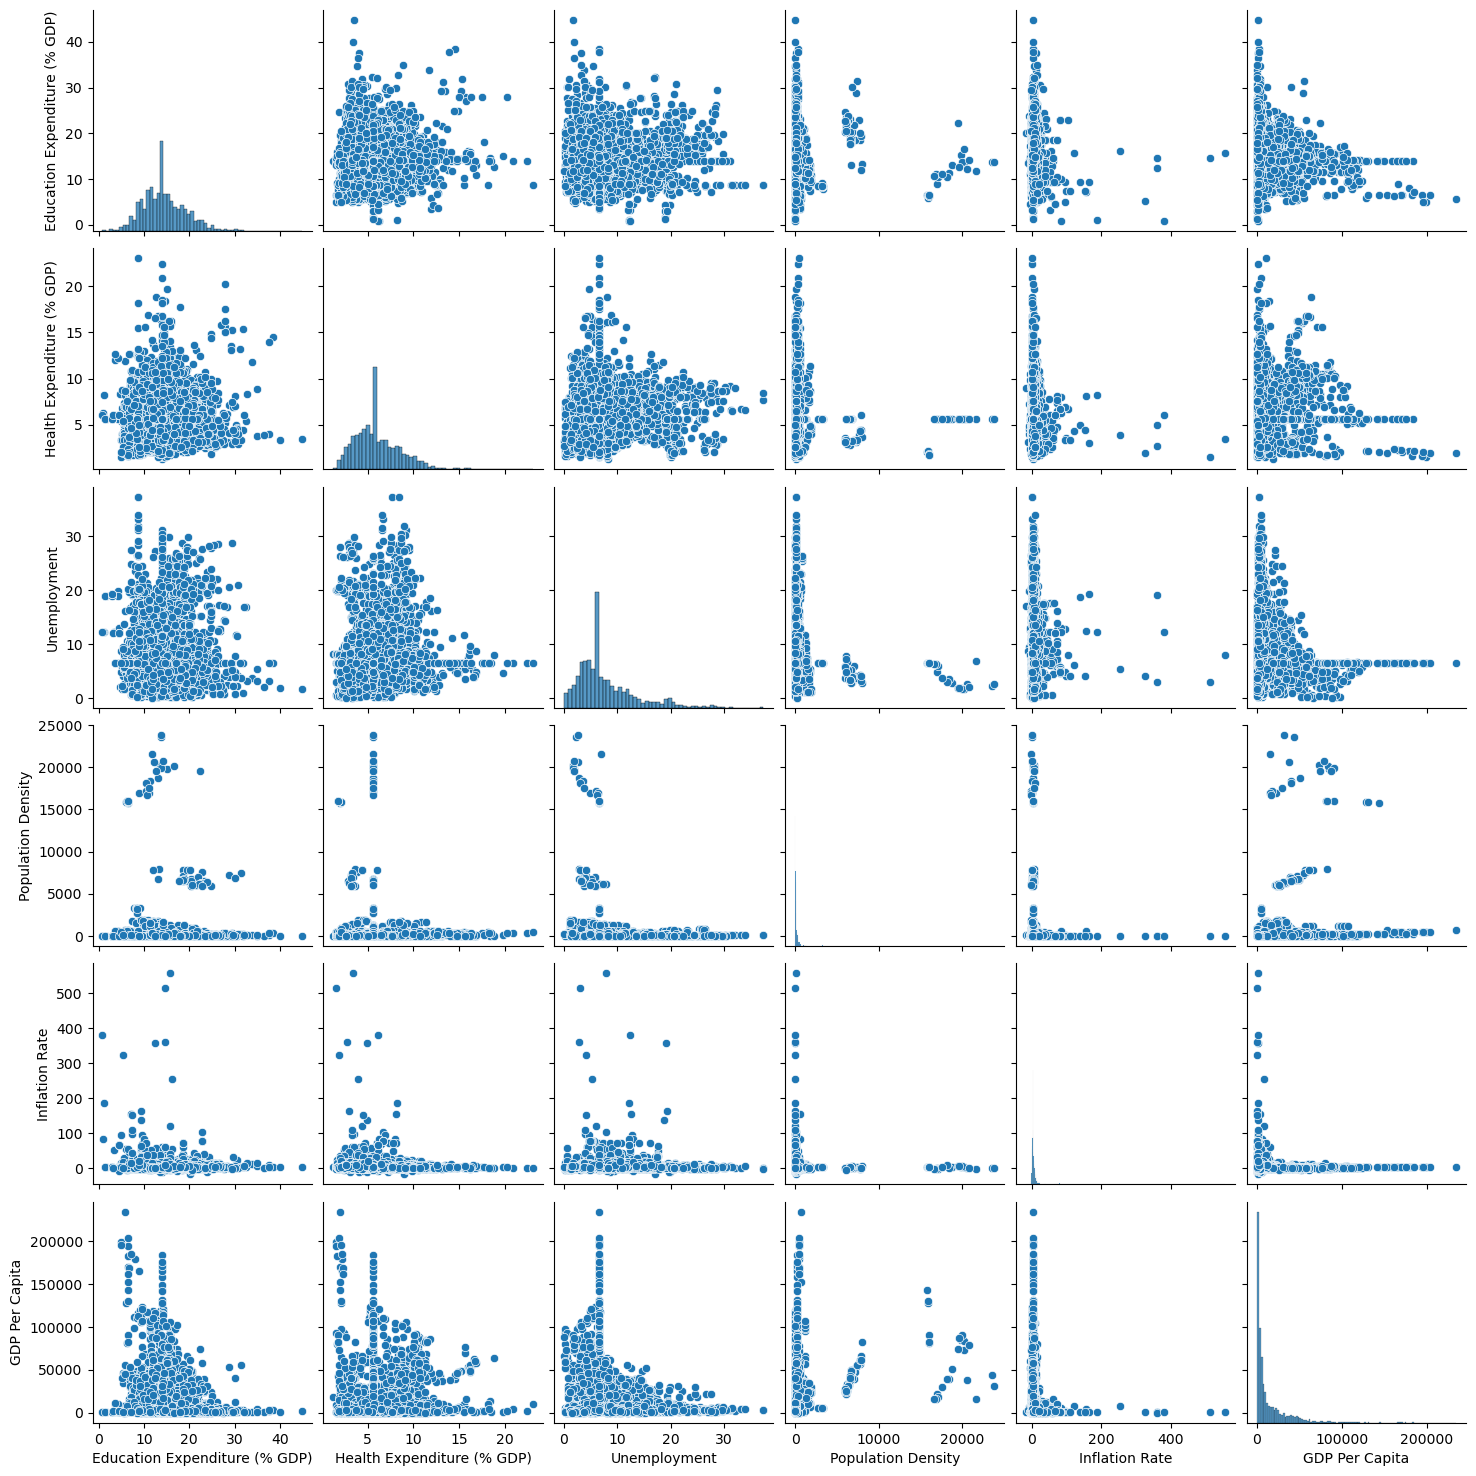

In [48]:
# Visualizing relationships and trends by creating pair plot.

sns.pairplot(pd.concat([x_train, y_train], axis = 1))
plt.show()

In [56]:
# Training the Linear Regression model

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [60]:
# Making predictions on the test set

y_pred = model.predict(x_test)

In [64]:
# Evaluation

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(439154371.35374916, 0.12800504560149562)

In [ ]:
# The model explains only 12.8% of the variance in the target variable (GDP Per Capita) which means that predictors are not strong enough to predict the
# target. High MSE also means that there is a significant difference between actual and predicted values.
# Next steps could be: (1) add stronger predictors for GDP Per Capita, (2) investigate the outliers, (3) use regularized regression or explore non_linear
#models.